# Canary transactions

The [Cardano Foundation](https://cardanofoundation.org/) regularly submits "canary transactions" to measure the delay from submitting a transaction to its first appearing in a block. See [queries.sql](queries.sql) for the `cardano-db-sync` SQL queries for fetching this data from Cardano mainnet.

## Setup up

In [1]:
suppressMessages({
    require(RColorBrewer, quietly=TRUE)
    require(data.table, quietly=TRUE)
    require(ggplot2, quietly=TRUE)
    require(magrittr, quietly=TRUE)
})

## Transaction delays in seconds

In [2]:
txs <- fread("canary-txs.csv.gz")
txs %>% summary

      time                            delay         sub_slot_no       
 Min.   :2024-07-22 09:43:30.00   Min.   :-15.00   Min.   :130075117  
 1st Qu.:2024-12-28 10:15:58.25   1st Qu.:  6.00   1st Qu.:143814644  
 Median :2025-04-30 08:24:19.00   Median : 15.00   Median :154435165  
 Mean   :2025-04-27 19:40:29.36   Mean   : 20.91   Mean   :154216517  
 3rd Qu.:2025-08-24 23:36:26.50   3rd Qu.: 28.00   3rd Qu.:164512280  
 Max.   :2025-12-19 11:15:36.00   Max.   :487.00   Max.   :174576642  
  avg_delay_1h    avg_delay_6h  
 Min.   :  1.8   Min.   :  2.0  
 1st Qu.: 14.2   1st Qu.: 17.8  
 Median : 19.4   Median : 20.4  
 Mean   : 20.9   Mean   : 20.9  
 3rd Qu.: 25.8   3rd Qu.: 23.3  
 Max.   :307.2   Max.   :172.8  

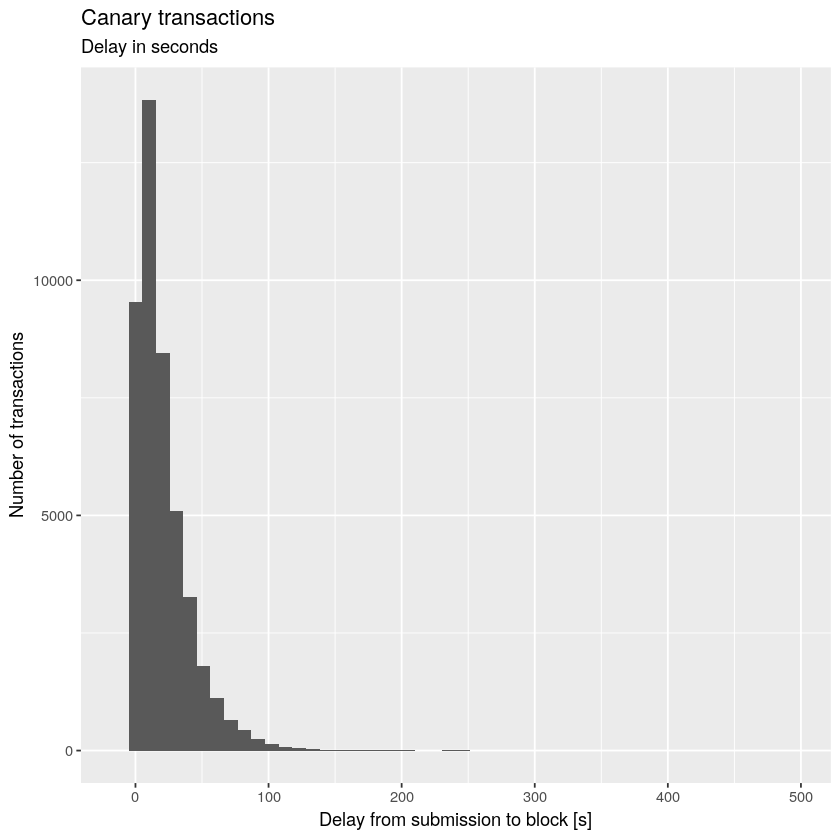

In [3]:
ggplot(txs, aes(x=`delay`)) +
    geom_histogram(bins=50) +
    xlab("Delay from submission to block [s]") +
    ylab("Number of transactions") +
    ggtitle("Canary transactions", "Delay in seconds")

## Transaction delays in blocks

In [4]:
blocks <- fread("canary-blocks.csv.gz")
blocks %>% summary

      time                         block_delay    
 Min.   :2024-07-22 09:43:30.00   Min.   : 1.000  
 1st Qu.:2024-12-28 11:04:19.00   1st Qu.: 1.000  
 Median :2025-04-30 09:02:29.00   Median : 1.000  
 Mean   :2025-04-27 20:02:37.42   Mean   : 1.079  
 3rd Qu.:2025-08-24 23:47:28.00   3rd Qu.: 1.000  
 Max.   :2025-12-19 11:15:36.00   Max.   :23.000  

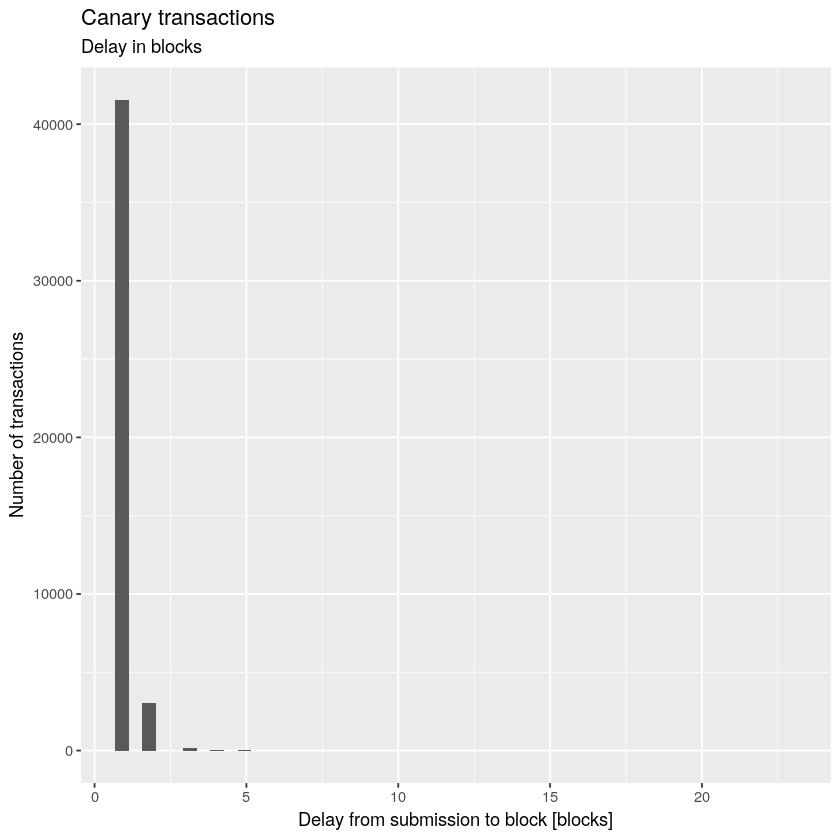

In [5]:
ggplot(blocks, aes(x=`block_delay`)) +
    geom_histogram(bins=50) +
    xlab("Delay from submission to block [blocks]") +
    ylab("Number of transactions") +
    ggtitle("Canary transactions", "Delay in blocks")